In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import rioxarray
import random
import numpy as np
from os import listdir
from os.path import isfile, join
from shapely.geometry import MultiPolygon, Polygon
import tree_dataset
from sklearn.preprocessing import LabelEncoder 

# Workflow to generate cutouts of 1 tile from the dataset

In [2]:
# data paths
region = 'Nestor Macias'
root = f'data/reforestree/tiles/{region} RGB/'
rgb_filenames = [f for f in listdir(root) if isfile(join(root, f))]
rgb_filename = rgb_filenames[4]
classes_path = f'data/reforestree/mapping/final_dataset.csv'

In [4]:
# load classes
annot = pd.read_csv(classes_path)

In [5]:
# Create shapely polygons from coordinates of annotated boxes and convert to geopandas dataframe and extract corresponding classes
# poly_list = []
classes = []
gdf = gpd.GeoDataFrame(columns=['geometry'], crs='epsg:4326', geometry='geometry')
for ind in annot.index:
    if rgb_filename == annot['img_path'][ind]:
        xmin = annot['xmin'][ind]
        xmax = annot['xmax'][ind]
        ymin = annot['ymin'][ind]
        ymax = annot['ymax'][ind]
        poly = (Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)]))
        poly_gpd = gpd.GeoDataFrame(crs='epsg:4326', geometry=[poly])
        gdf = pd.concat([gdf.geometry, poly_gpd.geometry], ignore_index=True)
        classes.append(annot['group'][ind])

In [6]:
# Process class labels in to a pandas df with numeric labels
dataclasses = ["other", "banana", "cacao", "citrus", "fruit", "timber"]
classes = pd.DataFrame(classes, columns=['class'])
classes["label"] = classes["class"].apply(dataclasses.index)
classes = classes['label']

In [7]:
#Generate cutouts from tree_dataset module - changes in line 63/64 of module for crs
ds = tree_dataset.TreeDataset([join(root, rgb_filename)], gdf, classes, augment_data=False, max_pixel_size=400, pixel_size=400)

In [8]:
ids, Y, X = ds.get_cutouts()

/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


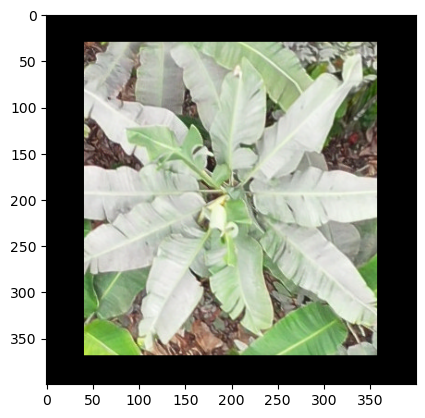

In [24]:
plt.imshow(X[0].astype(int))

# Generate cutouts from all tiles from one site

In [2]:
# The files are already loaded for Nestor Macias for which we will now produce cutouts for all tiles
def tile_cutouts(annot, rgb_filename, dataclasses):
    # Create shapely polygons from coordinates of annotated boxes and convert to geopandas dataframe and extract corresponding classes
    # poly_list = []
    classes = []
    gdf = gpd.GeoDataFrame(columns=['geometry'], crs='epsg:4326', geometry='geometry')
    for ind in annot.index:
        if rgb_filename == annot['img_path'][ind]:
            xmin = annot['xmin'][ind]
            xmax = annot['xmax'][ind]
            ymin = annot['ymin'][ind]
            ymax = annot['ymax'][ind]
            poly = (Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)]))
            poly_gpd = gpd.GeoDataFrame(crs='epsg:4326', geometry=[poly])
            gdf = pd.concat([gdf.geometry, poly_gpd.geometry], ignore_index=True)
            classes.append(annot['group'][ind])
    # Process class labels in to a pandas df with numeric labels
    classes = pd.DataFrame(classes, columns=['class'])
    classes["label"] = classes["class"].apply(dataclasses.index)
    classes = classes['label']

    ds = tree_dataset.TreeDataset([join(root, rgb_filename)], gdf, classes, augment_data=False, max_pixel_size=400, pixel_size=400)
    return ds.get_cutouts()
    

In [5]:
# data paths
region = 'Nestor Macias'
root = f'data/reforestree/tiles/{region} RGB/'
rgb_filenames = [f for f in listdir(root) if isfile(join(root, f))]

classes_path = f'data/reforestree/mapping/final_dataset.csv'
dataclasses = ["other", "banana", "cacao", "citrus", "fruit", "timber"]
annot = pd.read_csv(classes_path)
existcheck = True
for file in rgb_filenames:
    print (file)
    ids, Y_tile, X_tile = tile_cutouts(annot, file, dataclasses)
    if (existcheck):
        X = X_tile
        Y = Y_tile
        existcheck = False
    else:
        X = np.concatenate((X, X_tile), axis = 0)
        Y = np.concatenate((Y, Y_tile), axis = 0)
    

Nestor Macias RGB_0_0_0_4000_4000.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_10_7600_7600_11600_11600.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_11_7600_9024_11600_13024.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_12_11003_0_15003_4000.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_13_11003_3800_15003_7800.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_14_11003_7600_15003_11600.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_15_11003_9024_15003_13024.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_1_0_3800_4000_7800.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_2_0_7600_4000_11600.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_3_0_9024_4000_13024.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_4_3800_0_7800_4000.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_5_3800_3800_7800_7800.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_6_3800_7600_7800_11600.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_7_3800_9024_7800_13024.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_8_7600_0_11600_4000.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Nestor Macias RGB_9_7600_3800_11600_7800.png


/home/cpranav93/miniconda3/envs/xai4geo/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [40]:
#Save to file
np.savez('nestor_macias.npz', X=X, Y=Y)

# Generate cutouts from all tiles from all sites

In [ ]:
# data paths
regions = ['Carlos Vera Arteaga', 'Carlos Vera Guevara', 'Flora Pluas', 'Leonor Aspiazu', 'Manuel Macias', 'Nestor Macias']
dataclasses = ["other", "banana", "cacao", "citrus", "fruit", "timber"]
classes_path = f'data/reforestree/mapping/final_dataset.csv'
annot = pd.read_csv(classes_path) 
existcheck = True
for region in regions:
    print (region)
    root = f'data/reforestree/tiles/{region} RGB/'
    rgb_filenames = [f for f in listdir(root) if isfile(join(root, f))]

    for file in rgb_filenames:
        print (file)
        ids, Y_tile, X_tile = tile_cutouts(annot, file, dataclasses)
        if (existcheck):
            X = X_tile
            Y = Y_tile
            existcheck = False
        else:
            X = np.concatenate((X, X_tile), axis = 0)
            Y = np.concatenate((Y, Y_tile), axis = 0)
        